# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [19]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [20]:
# YOUR CODE HERE

# Adding a column of ones to X
X = np.column_stack((np.ones_like(X), X))

# Printing the shape of the resulting array X
print("Shape of X:", X.shape)

print(X[:5])  # Print the first 5 rows of X

Shape of X: (70, 2)
[[1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]]


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [95]:
# YOUR CODE HERE
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=1234)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (56, 2)
Shape of X_test: (14, 2)
Shape of Y_train: (56,)
Shape of Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

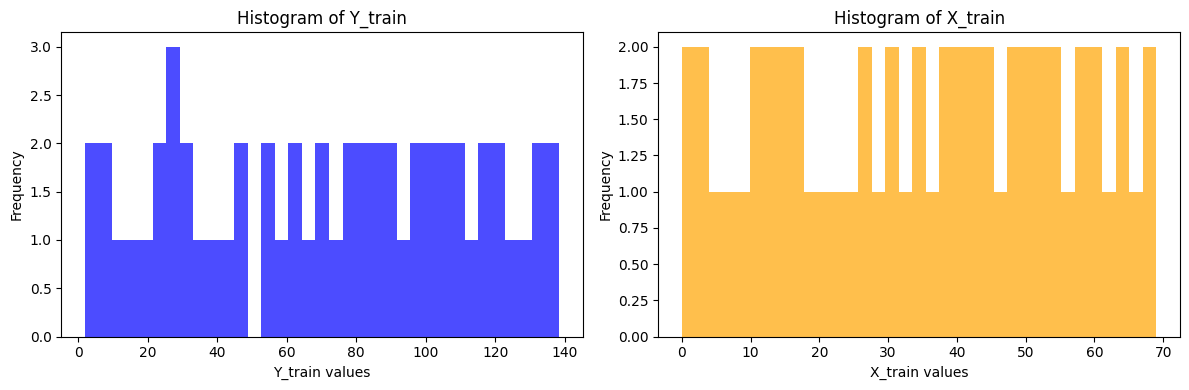

In [56]:
# YOUR CODE HERE
# plt.hist(Y_train, bins=5, alpha=0.5, label='Y_train')
# plt.hist(X_train, bins=5, alpha=0.5, label='X_train')
# plt.legend(loc='upper right')
# plt.show()

# Creating a side-by-side histogram for Y_train and the first column of X_train (which is the original X values) using subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot histogram for Y_train
axes[0].hist(Y_train, bins=35, color='blue', alpha=0.7)
axes[0].set_title('Histogram of Y_train')
axes[0].set_xlabel('Y_train values')
axes[0].set_ylabel('Frequency')

# Plotting histogram for the first column of X_train (which is the original X values without the added ones column)
axes[1].hist(X_train[:, 1], bins=35, color='orange', alpha=0.7)
axes[1].set_title('Histogram of X_train')
axes[1].set_xlabel('X_train values')
axes[1].set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()

plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$ 
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [57]:
# YOUR CODE HERE
#known parameters for both models
params_M1 = np.array([5, 1])
params_M2 = np.array([1, 2])

#Calculating predictions using matrix multiplication
M1_hat_train = np.dot(X_train, params_M1)
M2_hat_train = np.dot(X_train, params_M2)

print("Shape of Y_train:", Y_train.shape)
print("Shape of M1_hat_train:", M1_hat_train.shape)
print("Shape of M2_hat_train:", M2_hat_train.shape)

#First 5 predictions for verification
print("First 5 predictions of M1_hat_train:", M1_hat_train[:5])
print("First 5 predictions of M2_hat_train:", M2_hat_train[:5])


Shape of Y_train: (56,)
Shape of M1_hat_train: (56,)
Shape of M2_hat_train: (56,)
First 5 predictions of M1_hat_train: [55 70 26 57 50]
First 5 predictions of M2_hat_train: [101 131  43 105  91]


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch. 

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [ ]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W (you did this in exercise 5). 
    predictions = NotImplemented
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = NotImplemented
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = NotImplemented

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = NotImplemented

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

Epoch 1: 
Weights: [1. 1.]
Loss: 1665.3666608648086
Epoch 2: 
Weights: [1.00709394 1.33262886]
Loss: 742.4148662596615
Epoch 3: 
Weights: [1.01183193 1.55469157]
Loss: 331.0657262384294
Epoch 4: 
Weights: [1.01499708 1.7029404 ]
Loss: 147.73208292579974
Epoch 5: 
Weights: [1.01711221 1.80191116]
Loss: 66.02235863204444


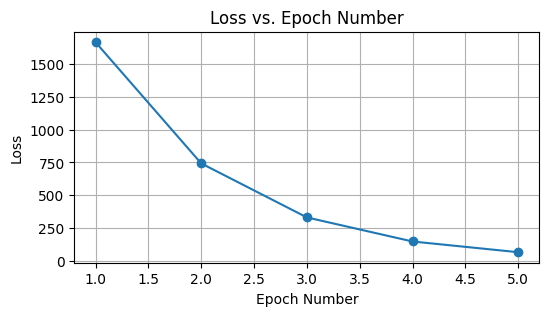

In [67]:
# YOUR CODE HERE
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W (you did this in exercise 5). 
    predictions = np.dot(inputs,W)
    
    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs
    
    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.sum(diff**2) / m

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)
    
    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    #gradient = np.dot(diff, W) / m
    gradient = np.dot(inputs.T, diff) / m

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)



weights, losses = gradient_descent(X_train, Y_train, 0.0002, 5)

#to print weights and losses after each epoch
for epoch in range(5):
  print(f"Epoch {epoch +1}: ")
  print("Weights:", weights[epoch])
  print("Loss:", losses[epoch])
  

plt.figure(figsize=(6, 3))

#plotting x-axis from 1 to 5 and losses in y-axis
plt.plot(range(1, 6), losses, marker='o', linestyle='-')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch Number')
plt.grid(True)
plt.show()
  

---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

Learnig rate: 0.0002, Epoch Number: 5, Last Loss: 66.02235863204444
Learnig rate: 0.02, Epoch Number: 5, Last Loss: 1943544404976516.2
Learnig rate: 0.0002, Epoch Number: 10, Last Loss: 1.479786682981072


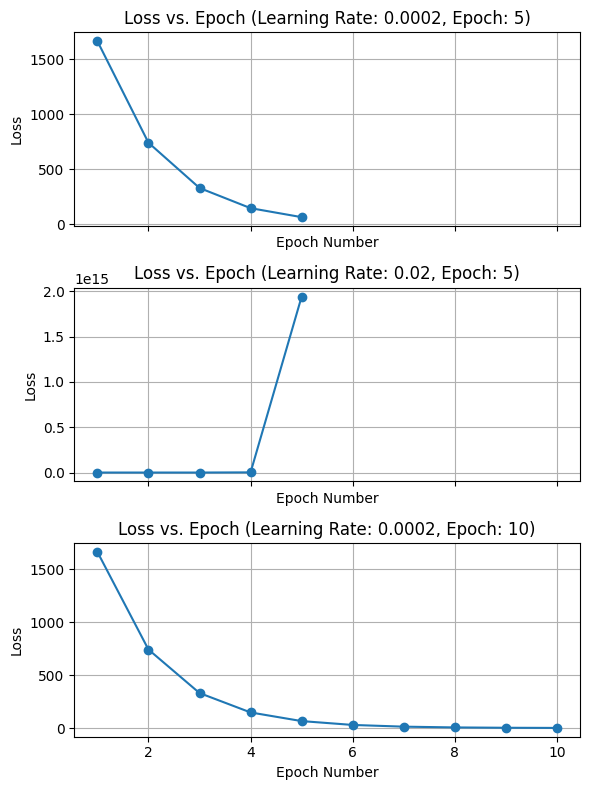

'It would not be beneficial to extend the learning rate to 0.002 as it can be seen from loss vs epoch graph\nthat the Loss diverges from epoch 4 to 5.\nYes, I would increase the number of epoch to 10 with the previous learning rate as it can ve seen that\nthe loss converges to 1.479'

In [82]:
# YOUR CODE HERE
#A list called scenarios containing dictionary with learning rates and number of epochs for the three different scenarios
scenarios = [
    {'learning_rate': 0.0002, 'num_epochs': 5},
    {'learning_rate': 0.02, 'num_epochs': 5},
    {'learning_rate': 0.0002, 'num_epochs': 10}
]

#subplots with same x-axis
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

# Iterating over each scenario
for i, scenario in enumerate(scenarios):
    learning_rate = scenario['learning_rate']
    num_epochs = scenario['num_epochs']
    
    #gradient descent
    weights, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)

    # Plotting loss values over epochs
    axes[i].plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-')
    axes[i].set_xlabel('Epoch Number')
    axes[i].set_ylabel('Loss')
    axes[i].set_title(f'Loss vs. Epoch (Learning Rate: {learning_rate}, Epoch: {num_epochs})')
    axes[i].grid(True)

    # Printing loss at the last epoch
    print(f"Learnig rate: {learning_rate}, Epoch Number: {num_epochs}, Last Loss: {losses[-1]}")

plt.tight_layout()
plt.show()


'''It would not be beneficial to extend the learning rate to 0.002 as it can be seen from loss vs epoch graph
that the Loss diverges from epoch 4 to 5.
Yes, I would increase the number of epoch to 10 with the previous learning rate as it can ve seen that
the loss converges to 1.479'''


### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [90]:
# YOUR ANSWER HERE
weights, losses = gradient_descent(X_train, Y_train, 0.0002, 10)
for epoch in range(10):
    print("Weights:", weights[epoch])
#print(weights)
'''The model is:
M3(x) = 1.02 + 1.97x1'''


Weights: [1. 1.]
Weights: [1.00709394 1.33262886]
Weights: [1.01183193 1.55469157]
Weights: [1.01499708 1.7029404 ]
Weights: [1.01711221 1.80191116]
Weights: [1.01852634 1.8679839 ]
Weights: [1.01947249 1.91209397]
Weights: [1.02010622 1.94154177]
Weights: [1.02053137 1.96120106]
Weights: [1.02081727 1.97432553]


'The model is:\nM3(x) = 1.02 + 1.97x1'

---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [107]:
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error

# Define the predictions of each model on the training data
# predictions_M1 = 5 + 1 * X_train
# predictions_M2 = 1 + 2 * X_train
# predictions_M3 = 1.02 + 1.97 * X_train

predictions_M1 = 5 + 1 * X_train[:, 1]
predictions_M2 = 1 + 2 * X_train[:, 1]
predictions_M3 = 1.02 + 1.97 * X_train[:, 1]


#MSE for each model
mse_M1 = mean_squared_error(Y_train, predictions_M1)
mse_M2 = mean_squared_error(Y_train, predictions_M2)
mse_M3 = mean_squared_error(Y_train, predictions_M3)

print("MSE for M1:", mse_M1)
print("MSE for M2:", mse_M2)
print("MSE for M3:", mse_M3)

#checking shape
print(predictions_M1.shape)
print(predictions_M2.shape)
print(predictions_M3.shape)



MSE for M1: 1397.608983658733
MSE for M2: 0.3280557752885262
MSE for M3: 1.891693399086605
(56,)
(56,)
(56,)


### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [112]:
# YOUR CODE HERE
predictions_M1_test = 5 + 1 * X_test[:, 1]
predictions_M2_test = 1 + 2 * X_test[:, 1]
predictions_M3_test = 1.02 + 1.97 * X_test[:, 1]


#MSE for each model
mse_M1_test = mean_squared_error(Y_test, predictions_M1_test)
mse_M2_test = mean_squared_error(Y_test, predictions_M2_test)
mse_M3_test = mean_squared_error(Y_test, predictions_M3_test)

print("MSE for M1 with test data:", mse_M1_test)
print("MSE for M2 with test data:", mse_M2_test)
print("MSE for M3 with test data:", mse_M3_test)

print(predictions_M1_test.shape)
print(predictions_M2_test.shape)
print(predictions_M3_test.shape)


'''Model 2 shows better generalizational ability as the MSE in test data is 0.29 and the MSE in training data is 0.328. 
However, Model 3 also shows good generaliational ability with the MSE being 1.37 in test data compared to 1.89 in
training data'''

MSE for M1 with test data: 1113.6003911560044
MSE for M2 with test data: 0.2908006971666422
MSE for M3 with test data: 1.3724356761095684
(14,)
(14,)
(14,)


----
#### <span style="color:chocolate">Bonus question</span> (20 points)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [ ]:
# YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE